 MODELE POUR LA DETECTION DE MALADIE DE CACAO A PARTIR DES IMAGES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
# Chemins des répertoires contenant les images 
train_dir = './healthy'


In [67]:
# Importation des bibliothèques nécessaires

import pandas as pd


# Lister les fichiers dans le répertoire
noms_fichiers = os.listdir(train_dir)

print(noms_fichiers)

['black_pod_rot_1.jpg', 'black_pod_rot_10.jpg', 'black_pod_rot_100.jpg', 'black_pod_rot_101.jpg', 'black_pod_rot_102.jpg', 'black_pod_rot_103.jpg', 'black_pod_rot_104.jpg', 'black_pod_rot_105.jpg', 'black_pod_rot_106.jpg', 'black_pod_rot_107.jpg', 'black_pod_rot_108.jpg', 'black_pod_rot_109.jpg', 'black_pod_rot_11.jpg', 'black_pod_rot_110.jpg', 'black_pod_rot_111.jpg', 'black_pod_rot_112.jpg', 'black_pod_rot_113.jpg', 'black_pod_rot_114.jpg', 'black_pod_rot_115.jpg', 'black_pod_rot_116.jpg', 'black_pod_rot_117.jpg', 'black_pod_rot_118.jpg', 'black_pod_rot_119.jpg', 'black_pod_rot_12.jpg', 'black_pod_rot_120.jpg', 'black_pod_rot_121.jpg', 'black_pod_rot_122.jpg', 'black_pod_rot_123.jpg', 'black_pod_rot_124.jpg', 'black_pod_rot_125.jpg', 'black_pod_rot_126.jpg', 'black_pod_rot_127.jpg', 'black_pod_rot_128.jpg', 'black_pod_rot_129.jpg', 'black_pod_rot_13.jpg', 'black_pod_rot_130.jpg', 'black_pod_rot_131.jpg', 'black_pod_rot_132.jpg', 'black_pod_rot_133.jpg', 'black_pod_rot_134.jpg', 'blac

In [68]:
# Initialiser une liste pour les catégories
categories = []

# Boucle pour assigner les catégories
for filename in noms_fichiers:
    # Obtenir la partie avant le premier point du nom de fichier
    categorie = filename.split('_')[0]
    # Vérifier si cette partie est "healthly"
    if categorie == 'healthy':
        # Ajouter 1 à la liste categories (indiquant que c'est une image healthly)
        categories.append(1)
    else:
        # Ajouter 0 à la liste categories (indiquant que c'est une image de black_pod_rot)
        categories.append(0)


In [ ]:
# Créer un DataFrame avec pandas
df = pd.DataFrame({
    'filename': noms_fichiers,
    'category': categories
})

# Afficher le DataFrame
#print(df.head())

In [71]:
df.shape

(4385, 2)

In [72]:
from tensorflow.keras.preprocessing import image
import random
# Sélectionner une image aléatoire
# Sélectionner une image aléatoire parmis les healthy
image_aleatoire = random.choice(noms_fichiers)


# Chemin complet de l'image sélectionnée
img_path = os.path.join(train_dir, image_aleatoire)
img_path

'./healthy\\healthy_881.jpg'

In [73]:
from tensorflow.keras.preprocessing import image
import random
# Sélectionner une image aléatoire parmis les black_pod_rot
# Sélectionner une image aléatoire
image_aleatoire = random.choice(noms_fichiers)


# Chemin complet de l'image sélectionnée
img_path = os.path.join(train_dir, image_aleatoire)
img_path

'./healthy\\healthy_23.jpg'

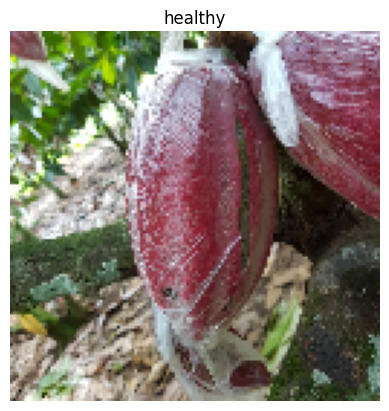

In [74]:
# Charger et afficher l'image
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
categorie = 'healthy' if 'healthy' in image_aleatoire else 'black_pod_rot'
plt.title(categorie)
plt.axis('off')
plt.show()

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [81]:
# Sélectionner aléatoirement 1500 images de back pod rot(catégorie 0)
healthy_df = df[df['category'] == 0].sample(n=1041, random_state=42)

# Sélectionner aléatoirement 1500 images de healthy(catégorie 1)
back_df = df[df['category'] == 1].sample(n=1500, random_state=42)

# Combiner les deux DataFrames
df_final = pd.concat([healthy_df, back_df]).reset_index(drop=True)
df_final

,filename,category
0,black_pod_rot_221.jpg,0
1,black_pod_rot_67.jpg,0
2,black_pod_rot_265.jpg,0
3,black_pod_rot_127.jpg,0
4,black_pod_rot_713.jpg,0
...,...,...
2536,healthy_887.jpg,1
2537,healthy_1399.jpg,1
2538,healthy_936.jpg,1
2539,healthy_1678.jpg,1


Utilisation d'un modèle pré-entrainé
Utilisation d'un Modèle Préentraîné pour la Classification des Images
Les modèles préentraînés offrent une solution puissante pour la classification des images, permettant de tirer parti de réseaux de neurones préalablement entraînés sur de larges ensembles de données. Deux méthodes principales sont couramment utilisées : l'extraction de caractéristiques (feature extraction) et le fine-tuning.

Méthodes
1. Extraction de Caractéristiques (Feature Extraction)
L'extraction de caractéristiques consiste à utiliser un modèle préentraîné comme un extracteur de caractéristiques. Les couches convolutives du modèle sont utilisées pour extraire des caractéristiques des images, qui sont ensuite utilisées par un classificateur (tel qu'un réseau de neurones entièrement connecté) pour effectuer la classification.

Étapes :

Charger un modèle préentraîné sans la couche de classification finale.
Geler les poids des couches convolutives pour éviter de les entraîner à nouveau.
Ajouter une ou plusieurs couches de classification.
Entraîner uniquement les nouvelles couches de classification avec les nouvelles données.

2. Fine-Tuning
Le fine-tuning consiste à ajuster les poids de tout ou partie d'un modèle préentraîné en utilisant un nouvel ensemble de données. Cela permet d'adapter le modèle préentraîné à la nouvelle tâche de classification.

Étapes :

Charger un modèle préentraîné.
Débloquer certaines des dernières couches du modèle pour permettre leur réentraînement.
Ajouter des couches de classification si nécessaire.
Entraîner le modèle entier (ou les couches dégelées) avec les nouvelles données.
Modèles Préentraînés Possibles
Voici une liste de quelques modèles préentraînés populaires que l'on peut utiliser pour la classification des images :

VGG16 : Un modèle de convolution profond avec 16 couches.

VGG19 : Une version étendue de VGG16 avec 19 couches.

ResNet50 : Un réseau résiduel avec 50 couches, connu pour ses performances élevées sur divers ensembles de données.

InceptionV3 : Un modèle de Google qui utilise des modules inception pour capturer des informations à différentes échelles.

Xception : Une version extrême de l'Inception, qui sépare les convolutions en profondeur.

MobileNet : Un modèle efficace en termes de calcul, idéal pour les applications mobiles et embarquées.

DenseNet : Un réseau dense qui connecte chaque couche à toutes les couches précédentes pour améliorer la propagation des gradients.

EfficientNet : Une famille de modèles qui équilibrent la taille du réseau, la profondeur, la largeur et la résolution des images pour 

obtenir de meilleures performances avec moins de paramètres.
En utilisant ces modèles préentraînés, il est possible de créer des systèmes de classification d'images robustes et précis en peu de temps, tout en bénéficiant des connaissances accumulées à partir de vastes ensembles de données d'entraînement.

In [52]:
from tensorflow.keras.applications import VGG16
# Initialisation de la base convolutionnelle du modèle VGG16 préentraîné.
# weights='imagenet' signifie que le modèle est préentraîné sur l'ensemble de données ImageNet, qui contient des millions d'images annotées.
# include_top=False signifie que les couches de classification dense (top layers) ne sont pas incluses,
# ce qui permet d'utiliser le modèle comme un extracteur de caractéristiques sans la dernière couche de classification.
# input_shape=(150, 150, 3) définit la taille des images d'entrée attendues par le modèle (150x150 pixels avec 3 canaux pour RGB).
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 543s 9us/step


In [82]:


# S'assurer que la colonne 'category' contient des chaînes de caractères
df_final['category'] = df_final['category'].astype(str)

In [83]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print(f"Taille de l'ensemble d'entraînement : {df_train.shape[0]}")
print(f"Taille de l'ensemble de test : {df_test.shape[0]}")

Taille de l'ensemble d'entraînement : 2032
Taille de l'ensemble de test : 509


In [84]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import pandas as pd
import os


In [85]:
# Préparation des générateurs de données
# Appliquer des transformations et normaliser les images pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normaliser les valeurs des pixels
    rotation_range=40,       # Rotation aléatoire des images jusqu'à 40 degrés
    width_shift_range=0.2,   # Décalage horizontal aléatoire jusqu'à 20%
    height_shift_range=0.2,  # Décalage vertical aléatoire jusqu'à 20%
    shear_range=0.2,         # Cisaillement aléatoire
    zoom_range=0.2,          # Zoom aléatoire jusqu'à 20%
    horizontal_flip=True,    # Retourner les images horizontalement
    fill_mode='nearest'      # Mode de remplissage pour les nouveaux pixels
)



# Normaliser les images pour l'ensemble de validation
val_datagen = ImageDataGenerator(rescale=1./255)  # Normaliser les valeurs des pixels

In [86]:
# Générateur de données pour l'entraînement
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    directory='./healthy',  # Remplacez par le chemin du répertoire contenant les images d'entraînement
    x_col='filename',                  # Nom de colonne pour les noms de fichiers
    y_col='category',                  # Nom de colonne pour les catégories
    target_size=(150, 150),            # Redimensionner les images à 150x150 pixels
    batch_size=32,                     # Nombre d'images par lot
    class_mode='binary'                # Mode de classification binaire (chat ou chien)
)

# Générateur de données pour la validation
validation_generator = val_datagen.flow_from_dataframe(
    df_test,
    directory='./healthy',  # Remplacez par le chemin du répertoire contenant les images de validation
    x_col='filename',                  # Nom de colonne pour les noms de fichiers
    y_col='category',                  # Nom de colonne pour les catégories
    target_size=(150, 150),            # Redimensionner les images à 150x150 pixels
    batch_size=32,                     # Nombre d'images par lot
    class_mode='binary'                # Mode de classification binaire (chat ou chien)
)


Found 2032 validated image filenames belonging to 2 classes.
Found 509 validated image filenames belonging to 2 classes.


In [87]:
# Charger le modèle VGG16 pré-entraîné sans la couche supérieure (include_top=False)
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [88]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# Geler toutes les couches sauf celles du bloc5_conv
for layer in conv_base.layers:
    if "block5" in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

In [90]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [91]:

# Ajouter des couches de classification au-dessus du modèle pré-entraîné
model = models.Sequential()                  # Initialiser un modèle séquentiel
model.add(conv_base)                         # Ajouter la base convolutive de VGG16
model.add(layers.Flatten())                  # Aplatir les sorties des convolutions
model.add(layers.Dense(256, activation='relu'))  # Ajouter une couche dense avec 256 unités et activation ReLU
model.add(layers.Dropout(0.5))               # Ajouter une couche de dropout pour réduire le surapprentissage
model.add(layers.Dense(1, activation='sigmoid')) # Ajouter une couche dense avec une unité de sortie et activation sigmoïde


In [92]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [93]:
# Compiler le modèle avec une perte binaire et un optimiseur RMSprop
model.compile(loss='binary_crossentropy',  # Utiliser la perte binaire cross-entropie
              optimizer=optimizers.RMSprop(learning_rate=2e-5),  # Utiliser l'optimiseur RMSprop avec un taux d'apprentissage réduit
              metrics=['accuracy'])        # Mesurer l'exactitude du modèle

# Entraîner le modèle
history = model.fit(
    train_generator,                        # Utiliser le générateur de données d'entraînement
    steps_per_epoch=50,  # Nombre de pas par époque
    epochs=30,                              # Nombre d'époques d'entraînement
    validation_data=validation_generator   # Utiliser le générateur de données de validation

)

Epoch 1/30


c:\Users\KONE\Tensorflow\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.5236 - loss: 0.8038 - val_accuracy: 0.7171 - val_loss: 0.5701
Epoch 2/30
14/50 ━━━━━━━━━━━━━━━━━━━━ 2:08 4s/step - accuracy: 0.6954 - loss: 0.5770

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6865 - loss: 0.5955 - val_accuracy: 0.7033 - val_loss: 0.5739
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.6914 - loss: 0.5791 - val_accuracy: 0.7426 - val_loss: 0.5535
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7153 - loss: 0.5671 - val_accuracy: 0.6876 - val_loss: 0.6932
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - accuracy: 0.7132 - loss: 0.5803 - val_accuracy: 0.7721 - val_loss: 0.5054
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7752 - loss: 0.4762 - val_accuracy: 0.7701 - val_loss: 0.5046
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 7112s 145s/step - accuracy: 0.7670 - loss: 0.5320 - val_accuracy: 0.7878 - val_loss: 0.4856
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7286 - loss: 0.5129 - val_accuracy: 0.7780 - val_loss: 0.4830
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.7835 - loss: 0.4702 - val_accuracy: 0.7859 - val_loss: 0.4

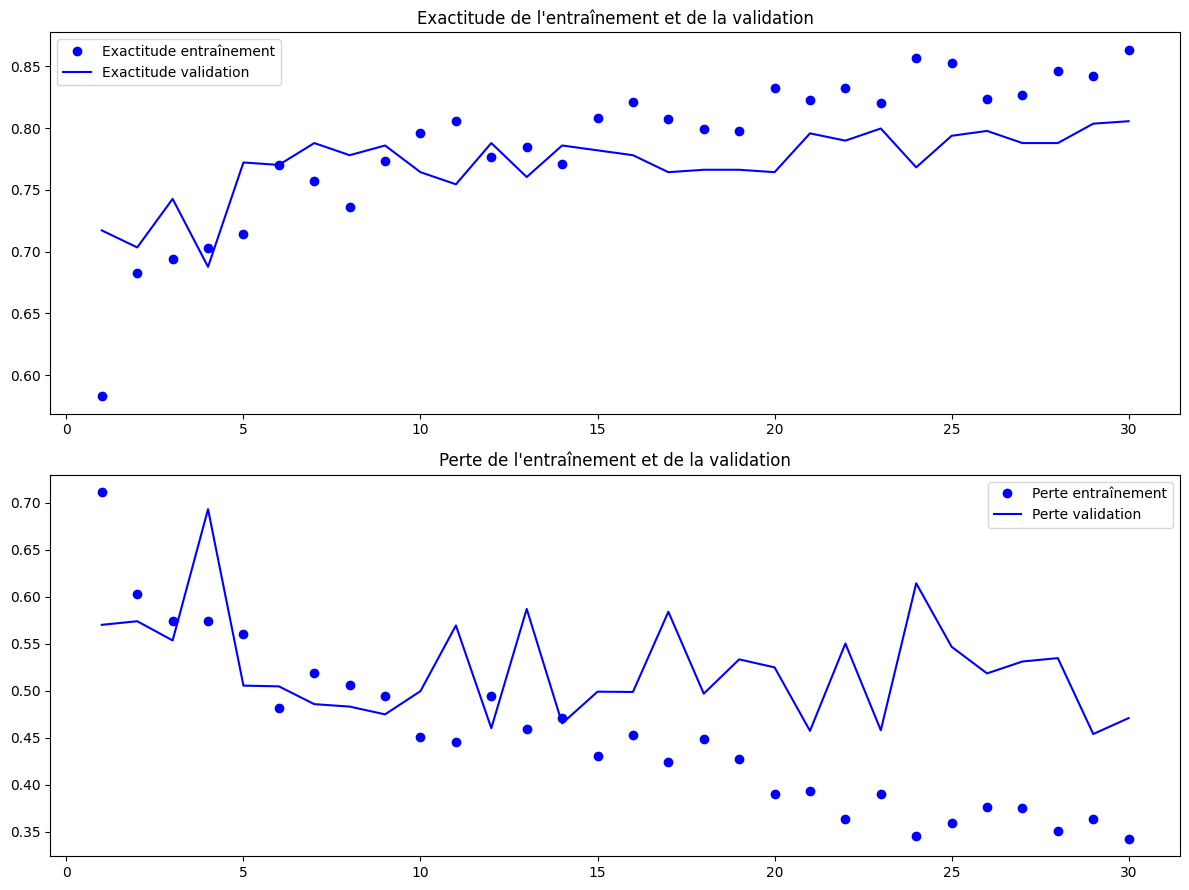

In [94]:

# Courbes de validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 9))

# Courbe de l'exactitude
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'bo', label='Exactitude entraînement')
plt.plot(epochs, val_acc, 'b', label='Exactitude validation')
plt.title("Exactitude de l'entraînement et de la validation")
plt.legend()

# Courbe de la perte
plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title("Perte de l'entraînement et de la validation")
plt.legend()

plt.tight_layout()
plt.show()


In [95]:

# Évaluer le modèle sur l'ensemble de validation
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")  # Afficher l'exactitude de validation en pourcentage

16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8275 - loss: 0.4025
Validation Accuracy: 80.55%


In [124]:
test_dir="./test_dataset"
fich_test = os.listdir(test_dir)

categories_test = []

# Boucle pour assigner les catégories
for filename in fich_test:
    # Obtenir la partie avant le premier point du nom de fichier
    catego = filename.split('_')[0]
    # Vérifier si cette partie est "healthly"
    if catego == 'healthy':
        # Ajouter 1 à la liste categories (indiquant que c'est une image healthly)
        categories_test.append(1)
    else:
        # Ajouter 0 à la liste categories (indiquant que c'est une image de black_pod_rot)
        categories_test.append(0)

print(fich_test)
# Créer un DataFrame avec pandas
df_test_bon = pd.DataFrame({
    'filename':fich_test,
    'category': categories_test
})

df_test_bon.head()

['black_pod_rot_2.jpg', 'black_pod_rot_363.jpg', 'black_pod_rot_46.jpg', 'black_pod_rot_50.jpg', 'black_pod_rot_54.jpg', 'healthy_481.jpg', 'healthy_489.jpg', 'healthy_494.jpg', 'healthy_503.jpg', 'healthy_517.jpg']


,filename,category
0,black_pod_rot_2.jpg,0
1,black_pod_rot_363.jpg,0
2,black_pod_rot_46.jpg,0
3,black_pod_rot_50.jpg,0
4,black_pod_rot_54.jpg,0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


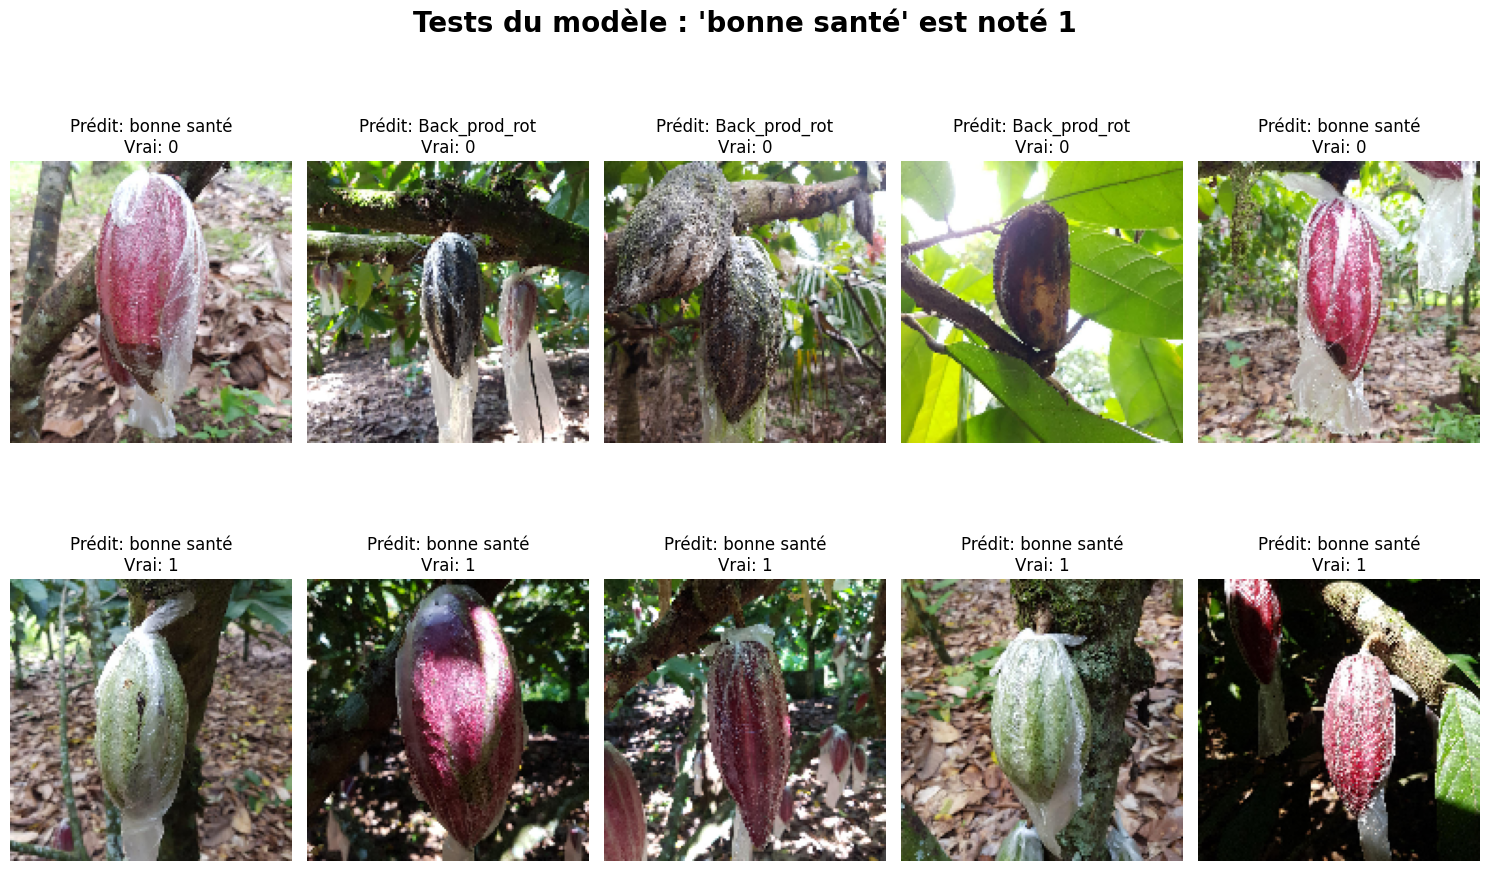

In [127]:
import numpy as np

# Prédictions sur 10 images
sample_images = df_test.sample(10).reset_index(drop=True)  # Échantillonner 10 images de validation

plt.figure(figsize=(15, 10))
plt.suptitle("Tests du modèle : 'bonne santé' est noté 1", fontsize=20, fontweight='bold')
for i, row in df_test_bon.iterrows():
    img_path = os.path.join('./test_dataset', row['filename'])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img) / 255.0
    img_tensor = np.expand_dims(img_tensor, axis=0)

    prediction = model.predict(img_tensor)
    prediction_label = 'bonne santé' if prediction[0] > 0.5 else 'Back_prod_rot'

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Prédit: {prediction_label}\nVrai: {row['category']}")
    plt.axis('off')
plt.savefig("test.png")
plt.tight_layout()
plt.show()

In [128]:

# Sauvegarder le modèle entraîné
model.save('cacao_vgg16.h5')